## Title: "IPL Winning Probability Predictor: Unleashing Machine Learning with Streamlit"

## Introduction:
Welcome to the IPL Winning Probability Predictor, where the thrill of cricket meets the power of machine learning! In this project, we leverage advanced algorithms to forecast the likelihood of a team winning a match in the Indian Premier League (IPL), one of the most popular cricket leagues globally. With the intuitive interface provided by Streamlit, cricket enthusiasts can now delve into data-driven predictions with ease.

## Objective:
The primary goal of this project is to develop a robust model that accurately predicts the outcome of IPL matches based on historical data. By analyzing various factors such as team performance, player statistics, run rate and more, we aim to provide users with insightful predictions for upcoming matches.

## Achievements:
## 1.Data Collection: 
    I have collected comprehensive data from past IPL seasons, including match results, player performance metrics, venue details, and more. This data provides a rich source for analyzing various factors influencing match outcomes.
## 2.Preprocessing:
     The collected data has undergone thorough preprocessing, including cleaning, normalization, feature engineering, and handling missing values. This ensures that the data is well-prepared for model training and yields optimal performance.
## 3.Model Development:
    Utilizing state-of-the-art machine learning techniques such as logistic regression, I have built predictive models capable of accurately estimating each team's winning probability. This involves training models on historical IPL data to learn patterns and relationships between different features.
## 4.Evaluation:
    The developed models have been rigorously evaluated using appropriate metrics to assess their performance and reliability. This ensures that the models generalize well to unseen data and provide reliable predictions.
## 5.Streamlit Interface:
     Integrating the predictive models with Streamlit, a user-friendly web application framework, I have created an interactive platform where users can input match parameters and obtain instant winning probability predictions. This makes the predictions easily accessible and user-friendly for cricket enthusiasts.

## Machine Learning Pipeline:
I have created a machine learning pipeline with two steps:

## Step 1 :
    Transformation ('trf'): Applying transformations to the data, which likely includes preprocessing steps such as feature scaling or encoding categorical variables.
## Step 2 :
    Logistic Regression Model: Training a logistic regression model using the 'liblinear' solver. Logistic regression is a popular choice for binary classification tasks like predicting match outcomes.

## Accuracy:
    My model has achieved nearly 80% accuracy, indicating its effectiveness in predicting IPL match outcomes.

Overall, my project has made impressive strides in leveraging machine learning and Streamlit to develop a robust IPL Winning Probability Predictor. With such high accuracy and a user-friendly interface, my tool has the potential to provide valuable insights and enhance the IPL experience for cricket fans.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd

In [2]:
#Reading the datasets
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
#Displaying the first five rows of matches dataset
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Displaying the shape of the dataset
match.shape

(756, 18)

In [5]:
#Displaying the first five rows of deliveries dataset
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
#Extracting the relevant features
total_score=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
#Displaying the total_score dataframe having only innings '1'
total_score=total_score[total_score['inning']==1]
total_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [8]:
match_df = match.merge(total_score[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [9]:
#Displaying the team names present in team1 in match_df dataframe
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
#List of team names that are required
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [11]:
#Replacing the Delhi Daredevils team name with Delhi Capitals
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

#Replacing the Deccan Chargers team name with Sunrisers Hyderabad
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [12]:
#Filter the match_df dataframe to include only rows where team1 is in the specified list of teams
match_df=match_df[match_df['team1'].isin(teams)]

#Filter the match_df dataframe to include only rows where team2 is in the specified list of teams
match_df=match_df[match_df['team2'].isin(teams)]

In [13]:
match_df.shape

(641, 20)

In [14]:
#Filtering the match_df dataframe based on the column dl_applied
match_df=match_df[match_df['dl_applied']==0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [15]:
#Considering the match_df dataframe with the following 4 columns
match_df=match_df[['match_id','city','winner','total_runs']]

In [16]:
#Merging the match_df dataframe with delviery dataframe
delivery_df=match_df.merge(delivery,on='match_id')
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [17]:
#Filtering the delivery_df dataframe based on the column inning
delivery_df=delivery_df[delivery_df['inning']==2]

In [18]:
#Displaying the shape of delivery_df dataframe
delivery_df.shape

(72413, 24)

In [19]:
# Ensure 'total_runs_y' is numeric
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'])

# Create the 'current_score' column
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\2781327755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'])
C:\Users\admin\AppData\Local\Temp\ipykernel_4436\2781327755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [20]:
#Create the new columns runs_left
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\2199752954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']


In [21]:
#Creating the new column balls_left
delivery_df['balls_left']= 126- (delivery_df['over']*6+ delivery_df['ball'])

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\475424435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left']= 126- (delivery_df['over']*6+ delivery_df['ball'])


In [22]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [23]:
# Ensure 'player_dismissed' column has "0" for NaN values
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Convert 'player_dismissed' to "1" if not "0"
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:"1" if x != "0" else "0")

# Convert 'player_dismissed' to integer type
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# Calculate cumulative sum of 'player_dismissed' grouped by 'match_id'
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

# Calculate remaining wickets and add to DataFrame
delivery_df['wickets'] = 10 - wickets

# Display the DataFrame
delivery_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\3147523856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
C:\Users\admin\AppData\Local\Temp\ipykernel_4436\3147523856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:"1" if x != "0" else "0")
C:\Users\admin\AppData\Local\Temp\ipykernel_4436\3147523856.py:8: SettingWithCopyWarning: 
A value is t

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [24]:
#Displaying the last five rows of delivery_df dataframe using tail method
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [25]:
#Current run rate(crr)=runs.overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\308529142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])


In [26]:
#Creating a new column Required run rate(rrr)
delivery_df['rrr']=(delivery_df['runs_left']*6)/(delivery_df['balls_left'])

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\308400548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr']=(delivery_df['runs_left']*6)/(delivery_df['balls_left'])


In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [28]:
#Creating a function result such that it gives '1' if batting team and winner are same,otherwise '0'
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [29]:
# Apply the 'result' function to each row in the 'delivery_df' DataFrame.
delivery_df['result']=delivery_df.apply(result,axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_4436\3892241808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result']=delivery_df.apply(result,axis=1)


In [30]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [31]:
# Create a new DataFrame 'final_df' containing a subset of columns from 'delivery_df'.
# The selected columns are: 'batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', and 'result'.
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [32]:
# Shuffle all the rows in 'final_df' by randomly sampling the entire DataFrame.
# 'final_df.shape[0]' returns the total number of rows, ensuring that all rows are included in the shuffle.
final_df = final_df.sample(final_df.shape[0])

In [33]:
#Printing some random data
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
147577,Kolkata Knight Riders,Kings XI Punjab,Mohali,154,98,10,186,8.727273,9.428571,1


In [34]:
#Checking whether there are null values
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [35]:
final_df.dropna(inplace=True)

In [36]:
# Keep only the rows where 'balls_left' is not 0
final_df = final_df[final_df['balls_left'] != 0]

# Model Building

In [37]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
#'x_train' contains the training data features.
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
149522,Chennai Super Kings,Mumbai Indians,Hyderabad,76,54,7,152,6.909091,8.444444
99701,Mumbai Indians,Rajasthan Royals,Mumbai,109,75,7,189,10.666667,8.720000
140966,Mumbai Indians,Kings XI Punjab,Mumbai,192,110,10,204,7.200000,10.472727
61590,Kolkata Knight Riders,Kings XI Punjab,Kolkata,68,66,8,134,7.333333,6.181818
99111,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,15,21,8,154,8.424242,4.285714
...,...,...,...,...,...,...,...,...,...
89153,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah,82,70,8,150,8.160000,7.028571
59935,Mumbai Indians,Deccan Chargers,Visakhapatnam,61,39,7,138,5.703704,9.384615
136172,Rajasthan Royals,Kings XI Punjab,Jaipur,68,31,8,200,8.898876,13.161290
1617,Mumbai Indians,Royal Challengers Bangalore,Bangalore,102,63,5,142,4.210526,9.714286


In [39]:
#Since first 3 columns are strings,Apply the OneHot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Step 1:Transformation

trf=ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],
remainder='passthrough')  

In [40]:
#Step 2: Apply Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [41]:
# Create a machine learning pipeline with two steps:
# Step 1: Apply the transformation 'trf'.
# Step 2: Train a logistic regression model using the 'liblinear' solver.
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [42]:
# Train the machine learning pipeline 'pipe' on the training data 'x_train' and corresponding labels 'y_train'.
pipe.fit(x_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [43]:
#Predict the labels for the test data 'x_test' using the trained pipeline 'pipe
y_pred=pipe.predict(x_test)

In [46]:
#Finding the Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)

# Predict on the training set
y_train_pred = pipe.predict(x_train)

# Predict on the test set
y_test_pred = pipe.predict(x_test)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

#Printing the confuson matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix:',cm)

Training Accuracy: 0.8050566817934925
Test Accuracy: 0.7972527857593384
Confusion matrix: [[5268 1562]
 [1331 6108]]


In [47]:
# Predict the probabilities of class labels for the 10th instance in the test set 'X_test' using the trained pipeline 'pipe'
pipe.predict_proba(x_test)[10]

array([0.86664634, 0.13335366])

In [48]:
def match_progression(x_df,match_id,pipe):
    
    # Filter the DataFrame 'x_df' to get data for a specific match ID
    match = x_df[x_df['match_id'] == match_id]

    # Filter the DataFrame to include only the last ball of each over
    match = match[(match['ball'] == 6)]

    # Create a temporary DataFrame containing relevant features
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()

     # Remove rows with no balls left in the over
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Predict probabilities of win/lose using the pipeline 'pipe'
    result = pipe.predict_proba(temp_df)

    # Calculate and add columns for win/lose probabilities
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)

     # Add column for the end of over
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    # Extract target (total runs required to win)
    target = temp_df['total_runs_x'].values[0]

    # Calculate and add columns for runs scored and wickets fallen in each over
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    # Print target total runs
    print("Target-",target)

     # Select and reorder columns for the output DataFrame
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [49]:
# Analyze the progression of the cricket match with match ID 74 using the 'match_progression' function.
# 'temp_df' contains the analyzed data, and 'target' represents the total runs required to win.

temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.7,44.3
10467,2,8,0,50.6,49.4
10473,3,1,0,57.3,42.7
10479,4,7,1,69.2,30.8
10485,5,12,0,59.1,40.9
10491,6,13,0,46.9,53.1
10497,7,9,0,41.0,59.0
10505,8,15,0,27.3,72.7
10511,9,7,0,25.1,74.9
10518,10,17,0,13.7,86.3


Text(0.5, 1.0, 'Target-178')

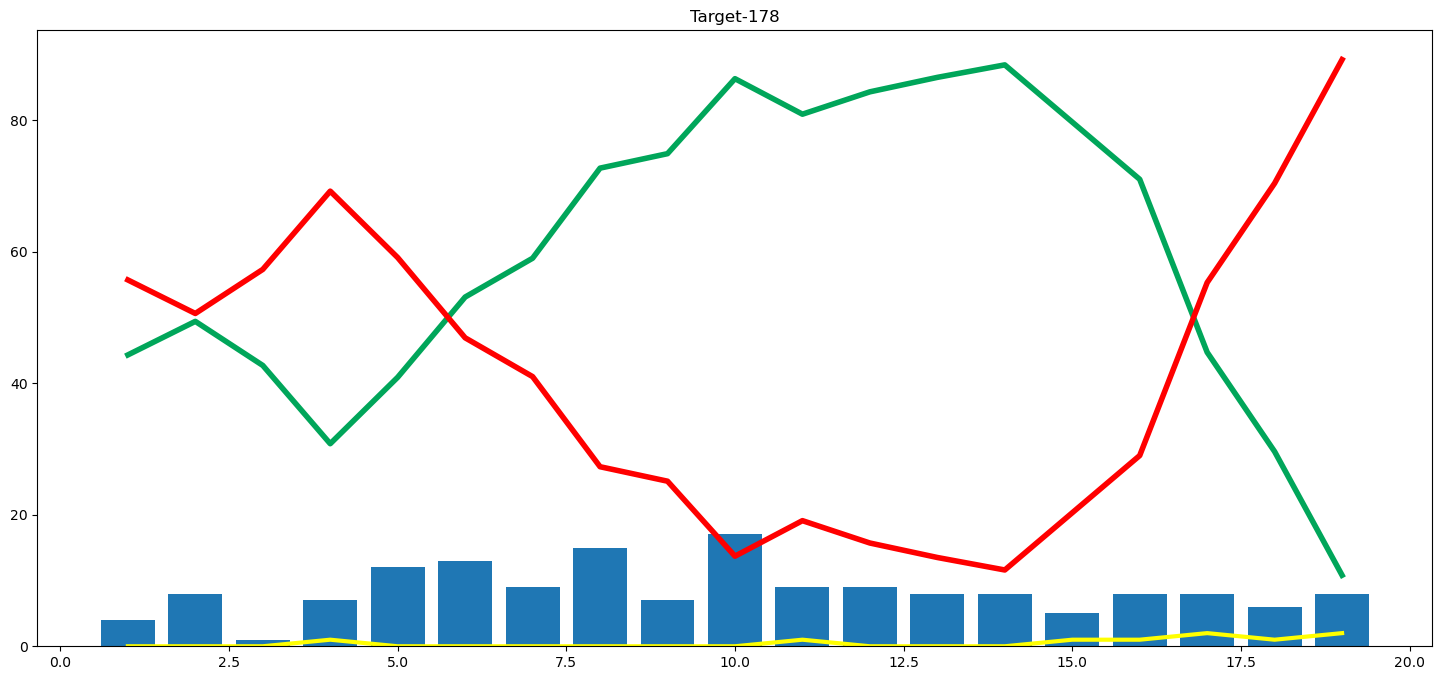

In [50]:
import matplotlib.pyplot as plt

# Set the size of the plot figure
plt.figure(figsize=(18,8))

# Plot wickets fallen in each over
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)

# Plot win probability over the course of the match
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)

# Plot lose probability over the course of the match
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)

# Plot bar chart for runs scored after each over
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])

# Set the title of the plot
plt.title('Target-' + str(target))

In [51]:
#For Website Development we require Team names,city names
#Displaying the team names
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [52]:
#Displaying city names
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [56]:
import pickle

# Save the trained pipeline 'pipe' as a binary file named 'pipe.pkl
pickle.dump(pipe,open('pipe.pkl','wb'))